In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chili-plant-disease/val/yellowish/yellowish09.jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish22 (1).jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish11 (1).jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish12.jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish24.jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish07.jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish16.jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish09 (1).jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish08 (1).jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish18 (1).jpg
/kaggle/input/chili-plant-disease/val/healthy/Cabai sehat098.jpg
/kaggle/input/chili-plant-disease/val/healthy/Cabai sehat076.jpg
/kaggle/input/chili-plant-disease/val/healthy/Cabai sehat080.jpg
/kaggle/input/chili-plant-disease/val/healthy/Cabai sehat078.jpg
/kaggle/input/chili-plant-disease/val/healthy/Cabai sehat056.jpg
/kaggle/input/c

In [66]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization, Reshape
from sklearn.metrics import accuracy_score
from keras.optimizers import RMSprop,Adam

In [67]:
import io
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report,accuracy_score, recall_score, precision_score, f1_score

In [68]:
X_trainc = []
Y_trainc = []
image_sizec = 150
labelsc = ['healthy', 'leaf curl', 'leaf spot', 'whitefly','yellowish']
for i in labelsc:
    folderPathc = os.path.join('/kaggle/input/chili-plant-disease/train', i)
    for j in os.listdir(folderPathc):
        imgc = cv2.imread(os.path.join(folderPathc, j))
        imgc = cv2.resize(imgc, (image_sizec, image_sizec))
        X_trainc.append(imgc)
        Y_trainc.append(i)
        

X_testc = []
Y_testc = []        
for i in labelsc:
    folderPathc1 = os.path.join('/kaggle/input/chili-plant-disease/test', i)
    for j in os.listdir(folderPathc1):
        imgc = cv2.imread(os.path.join(folderPathc1, j))
        imgc = cv2.resize(imgc, (image_sizec, image_sizec))
        X_testc.append(imgc)
        Y_testc.append(i)
        
X_valc = []
Y_valc = []        
for i in labelsc:
    folderPathc2 = os.path.join('/kaggle/input/chili-plant-disease/val', i)
    for j in os.listdir(folderPathc2):
        imgc = cv2.imread(os.path.join(folderPathc2, j))
        imgc = cv2.resize(imgc, (image_sizec, image_sizec))
        X_valc.append(imgc)
        Y_valc.append(i)      
        
X_trainc = np.array(X_trainc)
Y_trainc = np.array(Y_trainc)
X_testc = np.array(X_testc)
Y_testc = np.array(Y_testc)
X_valc = np.array(X_valc)
Y_valc = np.array(Y_valc)

In [69]:
X_trainc, Y_trainc = shuffle(X_trainc, Y_trainc, random_state=101)
X_trainc.shape

(400, 150, 150, 3)

In [70]:
X_testc, Y_testc = shuffle(X_testc, Y_testc, random_state=101)
X_testc.shape

(50, 150, 150, 3)

In [71]:
X_valc, Y_valc = shuffle(X_valc, Y_valc, random_state=101)
X_valc.shape

(50, 150, 150, 3)

In [72]:
label_mapping = {'healthy': 0, 'leaf curl': 1, 'leaf spot': 2, 'whitefly': 3, 'yellowish' : 4}
Y_test_intc = [label_mapping[label] for label in Y_testc]
Y_val_intc = [label_mapping[label] for label in Y_valc]
Y_train_intc = [label_mapping[label] for label in Y_trainc]


In [73]:
Y_train_encodedc = to_categorical(Y_train_intc, num_classes=5)
Y_val_encodedc = to_categorical(Y_val_intc, num_classes=5)
Y_test_encodedc = to_categorical(Y_test_intc, num_classes=5)

In [74]:
Y_train_new = []
for i in Y_trainc:
    Y_train_new.append(labelsc.index(i))
Y_trainc=Y_train_new
Y_trainc = tf.keras.utils.to_categorical(Y_trainc)

Y_test_new = []
for i in Y_testc:
    Y_test_new.append(labelsc.index(i))
Y_testc=Y_test_new
Y_testc = tf.keras.utils.to_categorical(Y_testc)

Y_val_new = []
for i in Y_valc:
    Y_val_new.append(labelsc.index(i))
Y_valc=Y_train_new
Y_valc= tf.keras.utils.to_categorical(Y_valc)


In [75]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [76]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,581 (13.19 MB)

 Trainable params: 3,455,877 (13.18 MB)

 Non-trainable params: 704 (2.75 KB)

In [77]:
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [78]:
history = model.fit(X_trainc, Y_train_encodedc, epochs=20, batch_size=32, verbose=2, validation_data=(X_valc, Y_val_encodedc), shuffle=True)

Epoch 1/20


2024-04-04 11:02:00.936470: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21904: 8.67349, expected 7.67828
2024-04-04 11:02:00.936531: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21905: 8.30703, expected 7.31181
2024-04-04 11:02:00.936540: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21906: 8.29129, expected 7.29607
2024-04-04 11:02:00.936548: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21910: 8.83682, expected 7.8416
2024-04-04 11:02:00.936570: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21911: 8.24576, expected 7.25055
2024-04-04 11:02:00.936583: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21912: 7.30326, expected 6.30804
2024-04-04 11:02:00.936597: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21913: 7.68038, expected 6.68516
2024-04-04 11:02:00.936610: 

13/13 - 14s - 1s/step - accuracy: 0.3175 - loss: 5.5658 - val_accuracy: 0.2000 - val_loss: 40.4911
Epoch 2/20
13/13 - 0s - 18ms/step - accuracy: 0.5300 - loss: 1.3511 - val_accuracy: 0.3600 - val_loss: 33.1254
Epoch 3/20
13/13 - 0s - 17ms/step - accuracy: 0.6150 - loss: 1.0278 - val_accuracy: 0.2800 - val_loss: 22.8481
Epoch 4/20
13/13 - 0s - 17ms/step - accuracy: 0.7250 - loss: 0.7745 - val_accuracy: 0.3600 - val_loss: 9.4348
Epoch 5/20
13/13 - 0s - 17ms/step - accuracy: 0.7825 - loss: 0.7152 - val_accuracy: 0.3200 - val_loss: 8.4768
Epoch 6/20
13/13 - 0s - 17ms/step - accuracy: 0.8000 - loss: 0.6212 - val_accuracy: 0.3000 - val_loss: 6.6318
Epoch 7/20
13/13 - 0s - 17ms/step - accuracy: 0.8225 - loss: 0.4992 - val_accuracy: 0.3800 - val_loss: 4.9603
Epoch 8/20
13/13 - 0s - 18ms/step - accuracy: 0.8425 - loss: 0.5463 - val_accuracy: 0.4000 - val_loss: 3.7160
Epoch 9/20
13/13 - 0s - 17ms/step - accuracy: 0.8575 - loss: 0.4313 - val_accuracy: 0.4200 - val_loss: 2.9642
Epoch 10/20
13/13 -

In [79]:
precc1 = model.predict(X_valc)
prec_labc1= np.argmax(precc1, axis=1)
precic1 = precision_score(Y_val_intc, prec_labc1, average='weighted')
recallc1 = recall_score(Y_val_intc, prec_labc1, average='weighted')
f1c1 = f1_score(Y_val_intc, prec_labc1, average='weighted')
cmc1 = confusion_matrix(Y_val_intc, prec_labc1)
print(cmc1)
accuracy1 = accuracy_score(Y_val_intc, prec_labc1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step
[[6 4 0 0 0]
 [4 4 0 1 1]
 [2 1 4 3 0]
 [0 2 1 7 0]
 [1 3 0 0 6]]


In [80]:
history1 = model.fit(X_trainc, Y_train_encodedc, epochs=20, batch_size=32, verbose=2, validation_data=(X_valc, Y_val_encodedc), shuffle=True)

Epoch 1/20
13/13 - 0s - 21ms/step - accuracy: 0.9725 - loss: 0.1148 - val_accuracy: 0.5000 - val_loss: 2.2707
Epoch 2/20
13/13 - 0s - 17ms/step - accuracy: 0.9625 - loss: 0.1391 - val_accuracy: 0.5400 - val_loss: 2.3809
Epoch 3/20
13/13 - 0s - 17ms/step - accuracy: 0.9725 - loss: 0.1153 - val_accuracy: 0.5800 - val_loss: 2.1114
Epoch 4/20
13/13 - 0s - 17ms/step - accuracy: 0.9700 - loss: 0.0974 - val_accuracy: 0.5600 - val_loss: 2.1649
Epoch 5/20
13/13 - 0s - 17ms/step - accuracy: 0.9800 - loss: 0.1054 - val_accuracy: 0.5800 - val_loss: 2.6176
Epoch 6/20
13/13 - 0s - 17ms/step - accuracy: 0.9775 - loss: 0.0847 - val_accuracy: 0.5800 - val_loss: 2.4950
Epoch 7/20
13/13 - 0s - 17ms/step - accuracy: 0.9775 - loss: 0.0762 - val_accuracy: 0.6000 - val_loss: 2.4564
Epoch 8/20
13/13 - 0s - 23ms/step - accuracy: 0.9750 - loss: 0.0711 - val_accuracy: 0.6000 - val_loss: 2.4809
Epoch 9/20
13/13 - 0s - 17ms/step - accuracy: 0.9775 - loss: 0.0673 - val_accuracy: 0.5800 - val_loss: 2.6642
Epoch 10/2

In [81]:
precc2 = model.predict(X_valc)
prec_labc2= np.argmax(precc2, axis=1)
precic2 = precision_score(Y_val_intc, prec_labc2, average='weighted')
recallc2 = recall_score(Y_val_intc, prec_labc2, average='weighted')
f1c2 = f1_score(Y_val_intc, prec_labc2, average='weighted')
cmc2 = confusion_matrix(Y_val_intc, prec_labc2)
print(cmc2)
accuracy2 = accuracy_score(Y_val_intc, prec_labc2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[4 6 0 0 0]
 [0 8 0 2 0]
 [1 2 5 2 0]
 [0 1 2 7 0]
 [0 3 0 0 7]]


In [82]:
history2 = model.fit(X_trainc, Y_train_encodedc, epochs=20, batch_size=32, verbose=2, validation_data=(X_valc, Y_val_encodedc), shuffle=True)

Epoch 1/20
13/13 - 0s - 21ms/step - accuracy: 0.9875 - loss: 0.0626 - val_accuracy: 0.5800 - val_loss: 3.6275
Epoch 2/20
13/13 - 0s - 17ms/step - accuracy: 0.9825 - loss: 0.0565 - val_accuracy: 0.6000 - val_loss: 3.8073
Epoch 3/20
13/13 - 0s - 17ms/step - accuracy: 0.9875 - loss: 0.0668 - val_accuracy: 0.6000 - val_loss: 3.8379
Epoch 4/20
13/13 - 0s - 17ms/step - accuracy: 0.9825 - loss: 0.0640 - val_accuracy: 0.6000 - val_loss: 3.5299
Epoch 5/20
13/13 - 0s - 17ms/step - accuracy: 0.9775 - loss: 0.0478 - val_accuracy: 0.5800 - val_loss: 4.0771
Epoch 6/20
13/13 - 0s - 17ms/step - accuracy: 0.9825 - loss: 0.0657 - val_accuracy: 0.5400 - val_loss: 3.7387
Epoch 7/20
13/13 - 0s - 17ms/step - accuracy: 0.9700 - loss: 0.0625 - val_accuracy: 0.5600 - val_loss: 3.8367
Epoch 8/20
13/13 - 0s - 17ms/step - accuracy: 0.9875 - loss: 0.0431 - val_accuracy: 0.5600 - val_loss: 4.2296
Epoch 9/20
13/13 - 0s - 18ms/step - accuracy: 0.9825 - loss: 0.0402 - val_accuracy: 0.5600 - val_loss: 4.0588
Epoch 10/2

In [83]:
precc3 = model.predict(X_valc)
prec_labc3= np.argmax(precc3, axis=1)
precic3 = precision_score(Y_val_intc, prec_labc3, average='weighted')
recallc3 = recall_score(Y_val_intc, prec_labc3, average='weighted')
f1c3 = f1_score(Y_val_intc, prec_labc3, average='weighted')
cmc3 = confusion_matrix(Y_val_intc, prec_labc3)
print(cmc3)
accuracy3 = accuracy_score(Y_val_intc, prec_labc3)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[3 7 0 0 0]
 [1 7 1 1 0]
 [1 2 5 2 0]
 [0 1 1 8 0]
 [0 3 0 0 7]]


In [84]:
history3 = model.fit(X_trainc, Y_train_encodedc, epochs=20, batch_size=32, verbose=2, validation_data=(X_valc, Y_val_encodedc), shuffle=True)

Epoch 1/20
13/13 - 0s - 21ms/step - accuracy: 0.9950 - loss: 0.0376 - val_accuracy: 0.6000 - val_loss: 5.5753
Epoch 2/20
13/13 - 0s - 17ms/step - accuracy: 0.9875 - loss: 0.0496 - val_accuracy: 0.6400 - val_loss: 5.4707
Epoch 3/20
13/13 - 0s - 17ms/step - accuracy: 0.9875 - loss: 0.0418 - val_accuracy: 0.6200 - val_loss: 5.1450
Epoch 4/20
13/13 - 0s - 17ms/step - accuracy: 0.9850 - loss: 0.0486 - val_accuracy: 0.5600 - val_loss: 5.1484
Epoch 5/20
13/13 - 0s - 17ms/step - accuracy: 0.9800 - loss: 0.0668 - val_accuracy: 0.5800 - val_loss: 5.1879
Epoch 6/20
13/13 - 0s - 18ms/step - accuracy: 0.9825 - loss: 0.0429 - val_accuracy: 0.6000 - val_loss: 4.6548
Epoch 7/20
13/13 - 0s - 18ms/step - accuracy: 0.9800 - loss: 0.0578 - val_accuracy: 0.6400 - val_loss: 4.7322
Epoch 8/20
13/13 - 0s - 17ms/step - accuracy: 0.9825 - loss: 0.0371 - val_accuracy: 0.6200 - val_loss: 4.9559
Epoch 9/20
13/13 - 0s - 17ms/step - accuracy: 0.9800 - loss: 0.0518 - val_accuracy: 0.5800 - val_loss: 4.9327
Epoch 10/2

In [85]:
precc4 = model.predict(X_valc)
prec_labc4= np.argmax(precc4, axis=1)
precic4 = precision_score(Y_val_intc, prec_labc4, average='weighted')
recallc4 = recall_score(Y_val_intc, prec_labc4, average='weighted')
f1c4 = f1_score(Y_val_intc, prec_labc4, average='weighted')
cmc4 = confusion_matrix(Y_val_intc, prec_labc4)
print(cmc4)
accuracy4 = accuracy_score(Y_val_intc, prec_labc4)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[4 6 0 0 0]
 [1 8 0 1 0]
 [1 2 5 2 0]
 [0 2 1 7 0]
 [1 3 0 0 6]]


In [86]:
history4 = model.fit(X_trainc, Y_train_encodedc, epochs=20, batch_size=32, verbose=2, validation_data=(X_valc, Y_val_encodedc), shuffle=True)

Epoch 1/20
13/13 - 0s - 20ms/step - accuracy: 0.9800 - loss: 0.0504 - val_accuracy: 0.6200 - val_loss: 5.5183
Epoch 2/20
13/13 - 0s - 17ms/step - accuracy: 0.9900 - loss: 0.0303 - val_accuracy: 0.6200 - val_loss: 5.6422
Epoch 3/20
13/13 - 0s - 17ms/step - accuracy: 0.9925 - loss: 0.0273 - val_accuracy: 0.6000 - val_loss: 5.3522
Epoch 4/20
13/13 - 0s - 17ms/step - accuracy: 0.9875 - loss: 0.0378 - val_accuracy: 0.6200 - val_loss: 5.3604
Epoch 5/20
13/13 - 0s - 17ms/step - accuracy: 0.9825 - loss: 0.0471 - val_accuracy: 0.6000 - val_loss: 5.4031
Epoch 6/20
13/13 - 0s - 17ms/step - accuracy: 0.9825 - loss: 0.0536 - val_accuracy: 0.6000 - val_loss: 4.9275
Epoch 7/20
13/13 - 0s - 17ms/step - accuracy: 0.9825 - loss: 0.0605 - val_accuracy: 0.6200 - val_loss: 5.4801
Epoch 8/20
13/13 - 0s - 17ms/step - accuracy: 0.9850 - loss: 0.0400 - val_accuracy: 0.6200 - val_loss: 6.6263
Epoch 9/20
13/13 - 0s - 17ms/step - accuracy: 0.9825 - loss: 0.0397 - val_accuracy: 0.6200 - val_loss: 5.9579
Epoch 10/2

In [87]:
precc5 = model.predict(X_valc)
prec_labc5= np.argmax(precc5, axis=1)
precic5 = precision_score(Y_val_intc, prec_labc5, average='weighted')
recallc5 = recall_score(Y_val_intc, prec_labc5, average='weighted')
f1c5 = f1_score(Y_val_intc, prec_labc5, average='weighted')
cmc5 = confusion_matrix(Y_val_intc, prec_labc5)
print(cmc5)
accuracy5 = accuracy_score(Y_val_intc, prec_labc5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[4 6 0 0 0]
 [0 9 0 1 0]
 [1 2 5 2 0]
 [0 1 3 6 0]
 [1 3 0 0 6]]


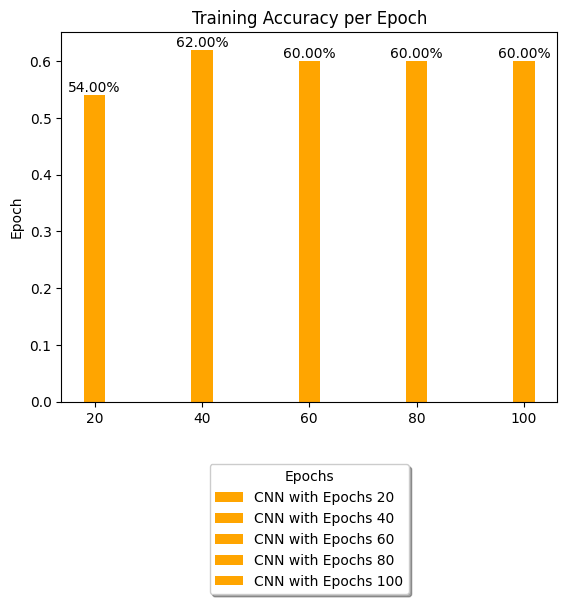

In [88]:
fig, ax = plt.subplots()
accu_all = [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5]
epochs = ['20', '40', '60', '80','100']
bar_labels = ['CNN with Epochs 20', 'CNN with Epochs 40', 'CNN with Epochs 60', 'CNN with Epochs 80', 'CNN with Epochs 100']
bar_colors = ['orange', 'orange', 'orange', 'orange','orange']
ax.bar(epochs, accu_all, label=bar_labels, color=bar_colors,width=0.2)
ax.set_ylabel('Accuracy')
ax.set_ylabel('Epoch')
ax.set_title('Training Accuracy per Epoch')
ax.legend(title='Epochs', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)
for i, ac in enumerate(accu_all):
    plt.text(epochs[i], ac, f'{ac:.2%}', ha='center', va='bottom')
plt.show()
# train_acc = (history.history['accuracy'], history1.history['accuracy'], history2.history['accuracy'], history3.history['accuracy'])
# plt.plot(epochs, acc_all, 'b')
# plt.title('Training Accuracy per Epoch')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# plt.show()

In [89]:
img = cv2.imread('/kaggle/input/chili-plant-disease/test/whitefly/whiteflya11.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [58]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

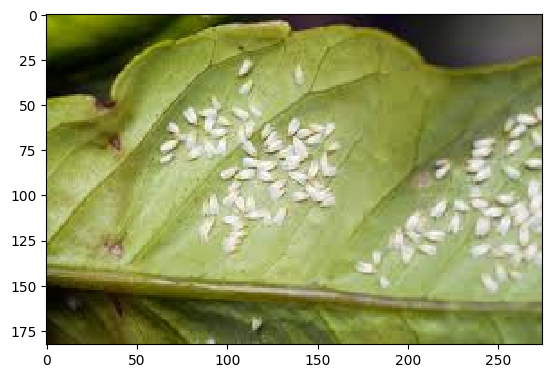

In [59]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/chili-plant-disease/test/whitefly/whiteflya11.jpg')
plt.imshow(img, interpolation='nearest')
plt.show()

In [60]:
a=model.predict(img_array)
indices = a.argmax()
indices

2024-04-04 10:57:23.870876: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30560: 4.13759, expected 3.62039
2024-04-04 10:57:23.870925: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30689: 4.16181, expected 3.6446
2024-04-04 10:57:23.870973: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 40495: 4.13759, expected 3.62039
2024-04-04 10:57:23.870982: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 40624: 4.16181, expected 3.6446
2024-04-04 10:57:23.871007: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44990: 4.55328, expected 3.99621
2024-04-04 10:57:23.871022: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47010: 4.40387, expected 3.8468
2024-04-04 10:57:23.871030: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47030: 4.30735, expected 3.75029
2024-04-04 10:57:23.871040: E 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


3

In [61]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_testc)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(Y_testc,axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[[5 5 0 0 0]
 [2 5 1 0 2]
 [0 4 4 2 0]
 [0 0 1 9 0]
 [0 3 0 0 7]]


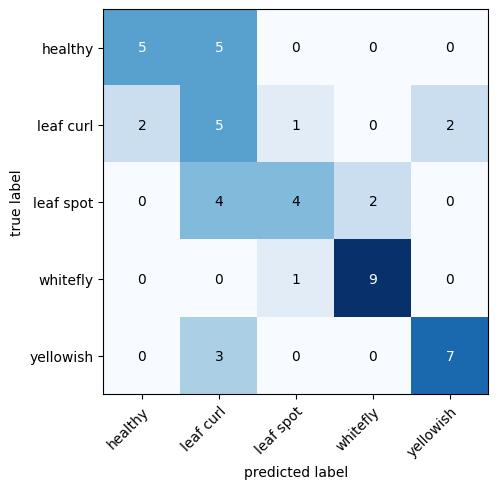

In [62]:
cm = confusion_matrix(y_true,pred)
print(cm)
from mlxtend.plotting import plot_confusion_matrix
ax = plot_confusion_matrix(conf_mat=cm,figsize=(5,5),class_names=labelsc)
plt.show()

In [63]:
from sklearn.metrics import classification_report
cr = classification_report(y_true,pred,target_names=labelsc)
print(cr)

              precision    recall  f1-score   support

     healthy       0.71      0.50      0.59        10
   leaf curl       0.29      0.50      0.37        10
   leaf spot       0.67      0.40      0.50        10
    whitefly       0.82      0.90      0.86        10
   yellowish       0.78      0.70      0.74        10

    accuracy                           0.60        50
   macro avg       0.65      0.60      0.61        50
weighted avg       0.65      0.60      0.61        50



In [64]:
model.save('chillicrops.keras')